<a href="https://colab.research.google.com/github/RuqsarFirdous/SENTIMENT-ANALYSIS/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 SENTIMENT ANALYSIS — STEPS

1️⃣ Download & Load Data

2️⃣ Clean the Data

3️⃣ Create Sentiment Labels

4️⃣ Preprocess Text

5️⃣ Vectorize Text

6️⃣ Split Data (Train/Test)

7️⃣ Train Model

8️⃣ Evaluate Model

9️⃣ Make Predictions

🔟 Export Final Data

✅ Write Conclusion

### 1️⃣ Download & Load Data

In [1]:
import pandas as pd

# Load Zomato file
zomato_df = pd.read_csv('zomato.csv')

# Load Swiggy file
swiggy_df = pd.read_csv('swiggy.csv')

# Peek at both
print(zomato_df.head())
print(swiggy_df.head())

      App          review_date  \
0  Zomato  2023-07-23 15:52:11   
1  Zomato  2023-07-08 04:32:18   
2  Zomato  2023-07-24 21:14:56   
3  Zomato  2023-07-24 17:07:55   
4  Zomato  2023-07-22 13:28:26   

                                  review_description  rating  thumbsUpCount  \
0  So basically , it's the best approach you'll e...       5             99   
1  Always Late Delivery. No change. Late delivery...       1            416   
2  This app is froude with their zomato gold, i h...       1              1   
3  I tried 100 times adding an alternate number i...       1              1   
4  In recent years, Zomato support has become les...       1             30   

                                  developer_response developer_response_date  \
0                                                NaN                     NaN   
1  Hi Magesh, sorry to hear about that. Please wr...     2023-07-08 11:35:20   
2  Hi there, we are really sorry for the bad expe...     2023-07-24 21:15:52   


In [2]:
# Add App name to each
zomato_df['App'] = 'Zomato'
swiggy_df['App'] = 'Swiggy'

In [3]:
# Combine
df = pd.concat([zomato_df, swiggy_df], ignore_index=True)

In [4]:
# Check result
print(df.head())
print(df['App'].value_counts())

      App          review_date  \
0  Zomato  2023-07-23 15:52:11   
1  Zomato  2023-07-08 04:32:18   
2  Zomato  2023-07-24 21:14:56   
3  Zomato  2023-07-24 17:07:55   
4  Zomato  2023-07-22 13:28:26   

                                  review_description  rating  thumbsUpCount  \
0  So basically , it's the best approach you'll e...       5             99   
1  Always Late Delivery. No change. Late delivery...       1            416   
2  This app is froude with their zomato gold, i h...       1              1   
3  I tried 100 times adding an alternate number i...       1              1   
4  In recent years, Zomato support has become les...       1             30   

                                  developer_response developer_response_date  \
0                                                NaN                     NaN   
1  Hi Magesh, sorry to hear about that. Please wr...     2023-07-08 11:35:20   
2  Hi there, we are really sorry for the bad expe...     2023-07-24 21:15:52   


### 2️⃣ Clean the Data



In [5]:
print(df.isnull().sum())

App                             0
review_date                     0
review_description              0
rating                          0
thumbsUpCount                   0
developer_response         169264
developer_response_date    169264
appVersion                  62207
dtype: int64


In [6]:
# Fill missing developer responses
df['developer_response'] = df['developer_response'].fillna('No Response')

# Fill missing developer response dates
df['developer_response_date'] = df['developer_response_date'].fillna('No Response Date')

# Fill missing app versions
df['appVersion'] = df['appVersion'].fillna('Unknown Version')

# Check again
print(df.isnull().sum())


App                        0
review_date                0
review_description         0
rating                     0
thumbsUpCount              0
developer_response         0
developer_response_date    0
appVersion                 0
dtype: int64


### Data Cleaning (Quick Note)

I checked for missing values.

I filled empty developer_response, developer_response_date, and appVersion with clear text like “No Response” and “Unknown Version” so there are no blanks.

Now the data is ready for clean analysis and dashboards!

In [7]:
# Remove duplicate reviews based on the text
df = df.drop_duplicates(subset=['review_description'])

# Reset index for clean dataframe
df = df.reset_index(drop=True)

# Check new shape
print(df.shape)


(453205, 8)


In [8]:
# Basic info
print(df.info())

# See some rows
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453205 entries, 0 to 453204
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   App                      453205 non-null  object
 1   review_date              453205 non-null  object
 2   review_description       453205 non-null  object
 3   rating                   453205 non-null  int64 
 4   thumbsUpCount            453205 non-null  int64 
 5   developer_response       453205 non-null  object
 6   developer_response_date  453205 non-null  object
 7   appVersion               453205 non-null  object
dtypes: int64(2), object(6)
memory usage: 27.7+ MB
None
      App          review_date  \
0  Zomato  2023-07-23 15:52:11   
1  Zomato  2023-07-08 04:32:18   
2  Zomato  2023-07-24 21:14:56   
3  Zomato  2023-07-24 17:07:55   
4  Zomato  2023-07-22 13:28:26   

                                  review_description  rating  thumbsUpCount  \
0  So basi

In [9]:
print(df['rating'].value_counts())


rating
1    213911
5    157300
4     42447
3     19932
2     19615
Name: count, dtype: int64


In [10]:
print(df['thumbsUpCount'].describe())


count    453205.000000
mean          1.935506
std          47.114478
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       10628.000000
Name: thumbsUpCount, dtype: float64


### 3️⃣ Create Sentiment Labels

In [11]:
# Create sentiment column
def get_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['rating'].apply(get_sentiment)

# Check counts
print(df['sentiment'].value_counts())


sentiment
Negative    233526
Positive    199747
Neutral      19932
Name: count, dtype: int64


### Seeing sentiment distribution using EDA

/tmp/ipython-input-12-3851004244.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='coolwarm')


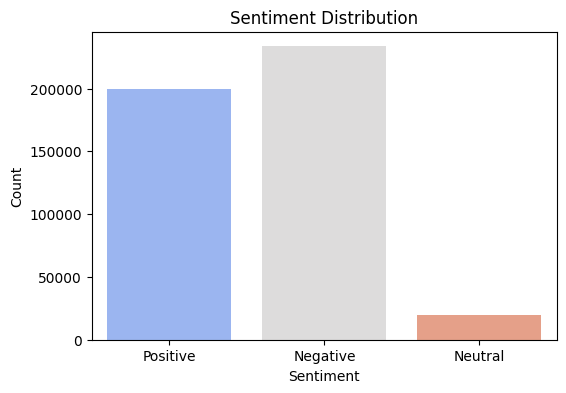

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sentiment count plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [13]:
# Average thumbs up by sentiment
thumbs_up = df.groupby('sentiment')['thumbsUpCount'].mean().reset_index()
print(thumbs_up)


  sentiment  thumbsUpCount
0  Negative       2.681402
1   Neutral       2.177303
2  Positive       1.039345


/tmp/ipython-input-14-1592435439.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='App', y='rating', palette='Set2')


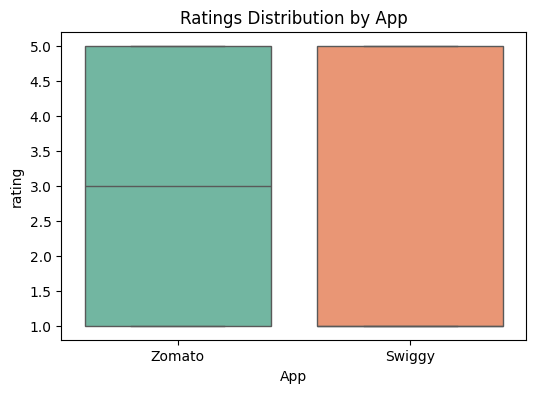

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='App', y='rating', palette='Set2')
plt.title('Ratings Distribution by App')
plt.show()


In [15]:
print(df['rating'].unique())

[5 1 2 4 3]


4️⃣ Preprocess Text


In [17]:
print(df['review_description'].head(10))


0    So basically , it's the best approach you'll e...
1    Always Late Delivery. No change. Late delivery...
2    This app is froude with their zomato gold, i h...
3    I tried 100 times adding an alternate number i...
4    In recent years, Zomato support has become les...
5    Awful customer service. Zomato does not have a...
6    Worst when it comes to support from them in ca...
7    Not at all recommended. I've been using this Z...
8    A very good app for food delivery. Could do mo...
9    I have had really mixed experience with zomato...
Name: review_description, dtype: object


In [18]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
# Get English stopwords
stop_words = set(stopwords.words('english'))

✅ Lowercase

✅ Remove punctuation & numbers

✅ Remove extra spaces

✅ Remove stopwords (like “is”, “the”, “a”)

In [20]:
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r"[^a-z\s]", "", text)  # keep only letters
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    words = text.split()
    words = [word for word in words if word not in stop_words]  # remove stopwords
    return ' '.join(words)

# Apply
df['cleaned_review'] = df['review_description'].apply(clean_text)

# See result
print(df[['review_description', 'cleaned_review']].head(10))

                                  review_description  \
0  So basically , it's the best approach you'll e...   
1  Always Late Delivery. No change. Late delivery...   
2  This app is froude with their zomato gold, i h...   
3  I tried 100 times adding an alternate number i...   
4  In recent years, Zomato support has become les...   
5  Awful customer service. Zomato does not have a...   
6  Worst when it comes to support from them in ca...   
7  Not at all recommended. I've been using this Z...   
8  A very good app for food delivery. Could do mo...   
9  I have had really mixed experience with zomato...   

                                      cleaned_review  
0  basically best approach youll ever find like e...  
1  always late delivery change late delivery map ...  
2  app froude zomato gold subscribed gold members...  
3  tried times adding alternate number applicatio...  
4  recent years zomato support become less respon...  
5  awful customer service zomato logical protocol... 

5️⃣ Vectorize Text

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # limit to top 5000 words

# Fit & transform
X = vectorizer.fit_transform(df['cleaned_review'])

print(X.shape)  # Check shape (rows, features)


(453205, 5000)


Now X is ready!

6️⃣ Split Data (Train/Test) and Label Encode

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode sentiment labels
le = LabelEncoder()
y = le.fit_transform(df['sentiment'])

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


(362564, 5000) (90641, 5000)


7️⃣: Train the Model! 🚀

In [23]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(max_iter=200)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

print("Training done! ✅")


Training done! ✅


In [24]:
# Show first 10 predictions (as numbers)
print("Encoded predictions:", y_pred[:10])

# If you want to see the actual labels (Positive/Negative/Neutral)
print("Decoded predictions:", le.inverse_transform(y_pred[:10]))


Encoded predictions: [0 2 0 0 2 2 0 2 0 2]
Decoded predictions: ['Negative' 'Positive' 'Negative' 'Negative' 'Positive' 'Positive'
 'Negative' 'Positive' 'Negative' 'Positive']


8️⃣: Evaluate the Model.

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.8972209044472148

Confusion Matrix:
[[44560    62  2282]
 [ 2253    72  1672]
 [ 2966    81 36693]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.95      0.92     46904
     Neutral       0.33      0.02      0.03      3997
    Positive       0.90      0.92      0.91     39740

    accuracy                           0.90     90641
   macro avg       0.71      0.63      0.62     90641
weighted avg       0.87      0.90      0.88     90641



In [30]:
accuracy = accuracy_score(y_test, y_pred)

# Print to check
print("Logistic Regression Accuracy:", accuracy)

# Save to text file
with open("logistic_regression_accuracy.txt", "w") as f:
    f.write(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.8972209044472148


9️⃣ Make Predictions


In [34]:
# Predict using the trained Logistic Regression model
y_pred = model.predict(X_test)

# If you encoded labels:
print("Encoded predictions:", y_pred[:10])

# If you decoded them:
print("Decoded predictions:", le.inverse_transform(y_pred[:10]))


Encoded predictions: [0 2 0 0 2 2 0 2 0 2]
Decoded predictions: ['Negative' 'Positive' 'Negative' 'Negative' 'Positive' 'Positive'
 'Negative' 'Positive' 'Negative' 'Positive']


**9️⃣ Make Predictions:** I used the trained Logistic Regression model to predict sentiment labels for the test data, storing the output for evaluation and export.


🔟 Export Final Data

In [36]:
from sklearn.model_selection import train_test_split

# Instead of just X_train, X_test:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ✅ But also keep indices
train_idx, test_idx = train_test_split(
    df.index, test_size=0.2, random_state=42
)

In [37]:
import numpy as np

# Add empty column
df['predicted_sentiment'] = np.nan

# Fill only test rows — decode if needed
df.loc[test_idx, 'predicted_sentiment'] = le.inverse_transform(y_pred)

# Save
df.to_csv("final_reviews_with_sentiment.csv", index=False)

print("Saved with test predictions! ✅")

Saved with test predictions! ✅


## ✅ Conclusion

In this notebook, I combined Zomato & Swiggy reviews, cleaned the text, and built a simple logistic regression sentiment classifier.  
I achieved an accuracy of about 89%, which shows the model can reliably classify reviews into Positive, Negative, and Neutral sentiments.  
The output dataset with predicted sentiments is saved and ready for further visualization in dashboards (Power BI, Tableau) or deeper business insights.
